# Compare autoarima from Skforecast, pmdarima and statsforecast

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)
import skforecast

print(skforecast.__version__)

/home/joaquin/Documents/GitHub/skforecast
0.20.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from skforecast.stats import Arima
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
from skforecast.datasets import fetch_dataset
from skforecast.plot import set_dark_theme
import warnings
import timeit

╭──────────────────────────────── fuel_consumption ────────────────────────────────╮
│ Description:                                                                     │
│ Monthly fuel consumption in Spain from 1969-01-01 to 2022-08-01.                 │
│                                                                                  │
│ Source:                                                                          │
│ Obtained from Corporación de Reservas Estratégicas de Productos Petrolíferos and │
│ Corporación de Derecho Público tutelada por el Ministerio para la Transición     │
│ Ecológica y el Reto Demográfico. https://www.cores.es/es/estadisticas            │
│                                                                                  │
│ URL:                                                                             │
│ https://raw.githubusercontent.com/skforecast/skforecast-                         │
│ datasets/main/data/consumos-combustibles-mensual.csv                             │
│                                                                                  │
│ Shape: 644 rows x 6 columns                                                      │
╰──────────────────────────────────────────────────────────────────────────────────╯

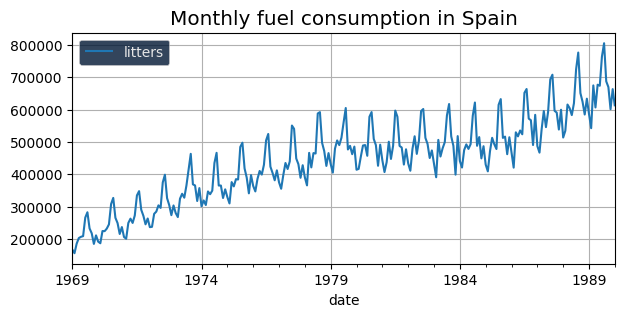

In [3]:
data = fetch_dataset(name='fuel_consumption', raw=True)
data = data[['Fecha', 'Gasolinas']]
data = data.rename(columns={'Fecha':'date', 'Gasolinas':'litters'})
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.loc[:'1990-01-01 00:00:00']
data = data.asfreq('MS')
data = data['litters']
# Plot
# ======================================================================================
fig, ax = plt.subplots(figsize=(7, 3))
set_dark_theme()
data.plot(ax=ax)
ax.set_title('Monthly fuel consumption in Spain')
ax.legend();

In [5]:
estimator = Arima(
            order             = None, # El algoritmo determina 'order'
            seasonal_order    = None, # El algoritmo determina 'seasonal_order'
            start_p           = 0,
            start_q           = 0,
            max_p             = 3,
            max_q             = 3,
            max_P             = 2,
            max_Q             = 2,
            max_order         = 5,
            max_d             = 2,
            max_D             = 1,
            seasonal          = True,
            test              = 'adf',
            m                 = 12,   # periodicidad de la estacionalidad
            trace             = False,
            stepwise          = True
        )
estimator.fit(y=data, suppress_warnings= True)

,order,None
,seasonal_order,None
,m,12
,include_mean,True
,transform_pars,True
,method,'CSS-ML'
,n_cond,None
,SSinit,'Gardner1980'
,optim_method,'BFGS'
,optim_kwargs,{'maxiter': 1000}
,kappa,1000000.0


In [12]:
%%timeit

estimator = Arima(
            order             = None, # El algoritmo determina 'order'
            seasonal_order    = None, # El algoritmo determina 'seasonal_order'
            start_p           = 0,
            start_q           = 0,
            max_p             = 3,
            max_q             = 3,
            max_P             = 2,
            max_Q             = 2,
            max_order         = 5,
            max_d             = 2,
            max_D             = 1,
            seasonal          = True,
            test              = 'adf',
            m                 = 12,   # periodicidad de la estacionalidad
            trace             = False,
            stepwise          = True
        )
estimator.fit(y=data, suppress_warnings= True)

5.35 s ± 78.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit

estimator.predict(steps=100)

334 μs ± 3.31 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
